In [1]:
import sys
import warnings
warnings.filterwarnings("ignore")
from scipy.special import gamma
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use("plot_style.mplstyle")

sys.path.append("../src/")
from fLe import fle#_guo as fle
import fBm_stats as fbs

In [2]:
def plot_results(equation, axi, panel, xlabel = False, ylabel = True):
    t = equation.t
    num = equation.numerical
    anl = equation.analytical
    H = equation.H
    
    axi.plot(t, num, ls="", marker = "^", label = "Numerical")
    axi.plot(t, anl, ls = "-", label = "Analytical")
    if ylabel:
        axi.set_ylabel(r"$q(t)$")
    if xlabel:
        axi.set_xlabel(r"$t$")
    axi.set_title(panel)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
    axi.text(0.80, 0.15, f"H = {H}", transform=axi.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

0.51
0.6
0.7
0.8
0.9
0.99


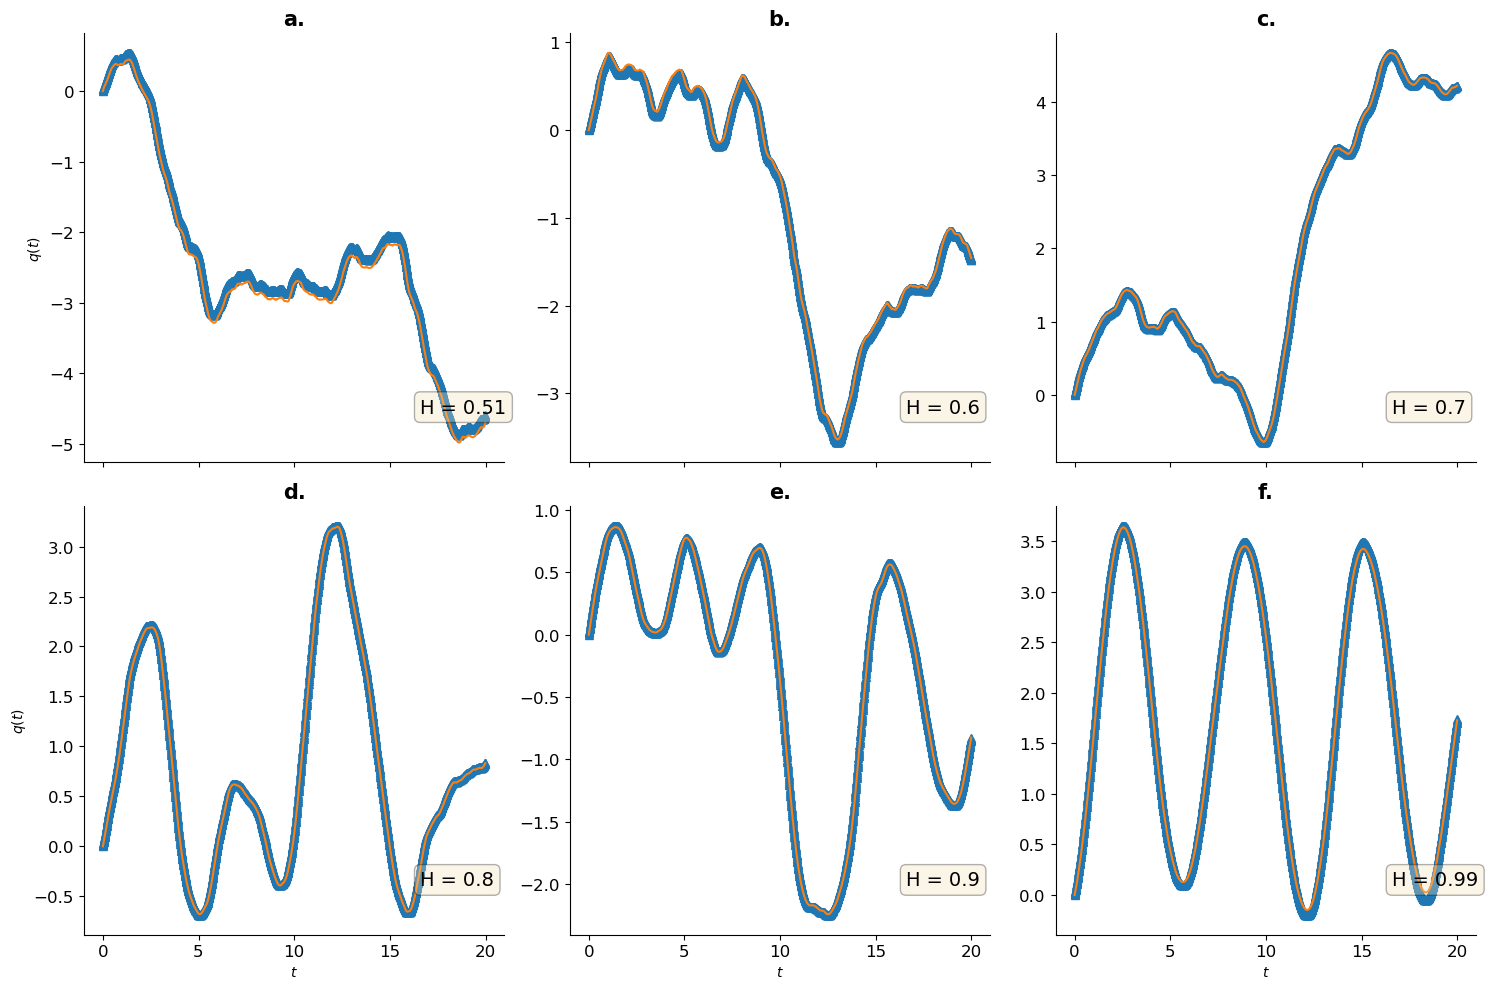

In [3]:
T = 20
fig, ax = plt.subplots(2,3, figsize=(15,10), sharex = True)

H = 0.51
eq = fle(H)
eq.params(T)
eq.make_B_H()
eq.get_analytical()
eq.solve()
axi=ax[0][0]
print(H)
plot_results(eq, axi, "a.", xlabel = False, ylabel = True)

H = 0.6
eq = fle(H)
eq.params(T)
eq.make_B_H()
eq.get_analytical()
eq.solve()
axi=ax[0][1]
print(H)
plot_results(eq, axi, "b.", xlabel = False, ylabel = False)

H = 0.7
eq = fle(H)
eq.params(T)
eq.make_B_H()
eq.get_analytical()
eq.solve()
axi=ax[0][2]
print(H)
plot_results(eq, axi, "c.", xlabel = False, ylabel = False)

H = 0.8
eq = fle(H)
eq.params(T)
eq.make_B_H()
eq.get_analytical()
eq.solve()
axi=ax[1][0]
print(H)
plot_results(eq, axi, "d.", xlabel = True, ylabel = True)

H = 0.9
eq = fle(H)
eq.params(T)
eq.make_B_H()
eq.get_analytical()
eq.solve()
axi=ax[1][1]
print(H)
plot_results(eq, axi, "e.", xlabel = True, ylabel = False)

H = 0.99
eq = fle(H)
eq.params(T)
eq.make_B_H()
eq.get_analytical()
eq.solve()
axi=ax[1][2]
print(H)
plot_results(eq, axi, "f.", xlabel = True, ylabel = False)
fig.show();

In [4]:
def msd(H, T, realizations = 100):
    for r in tqdm(range(realizations)):
        eq = fle(H)
        eq.params(T)
        eq.make_B_H()
        eq.solve()        
        if r == 0:
            df_msd = pd.DataFrame({"t": eq.t})
        df_msd["x_"+str(r)] = eq.numerical        
    df_msd.set_index("t", inplace = True)
    msd = fbs.msd(df_msd, False)
    return msd

In [5]:
def plot_msd(H, T, realizations = 1000):
    eq = fle(H)
    eq.params(T)
    eq.make_B_H()
    eq.get_analytical()
    eq.get_msd_analytical()
    eq.get_msd_analytical_limit()
    
    msd_num = msd(H, T, realizations)
    
    fig, ax = plt.subplots(1,3, figsize=(9,3))
    ax[0].plot(eq.t, eq.msd_analytical, label = "Anl.")
    ax[0].plot(eq.t, eq.msd_analytical_limit, label = "Anl. lim")
    ax[0].plot(eq.t, msd_num, label = "Num.")
    ax[0].set_xlabel("t")
    ax[0].set_ylabel("MSD")
    ax[0].legend(loc = "upper left")

    scale = np.mean((eq.msd_analytical/msd_num)[T*0.8:])

    ax[1].plot(eq.t, eq.msd_analytical/msd_num)
    ax[1].axhline(y = scale, color = "red")
    ax[1].set_xlabel("t")
    ax[1].set_ylabel("Scale factor")

    ax[2].hist(eq.msd_analytical/msd_num, orientation="horizontal")
    ax[2].axhline(y = scale, color = "red")
    ax[2].set_xlabel("Freq.")
    ax[2].set_ylabel("Dist. Scale factor")
    
    fig.suptitle("H = " + str(H))
    
    return pd.DataFrame({"H":[H], "scale": [scale]})

100%|██████████| 1000/1000 [08:40<00:00,  1.92it/s]


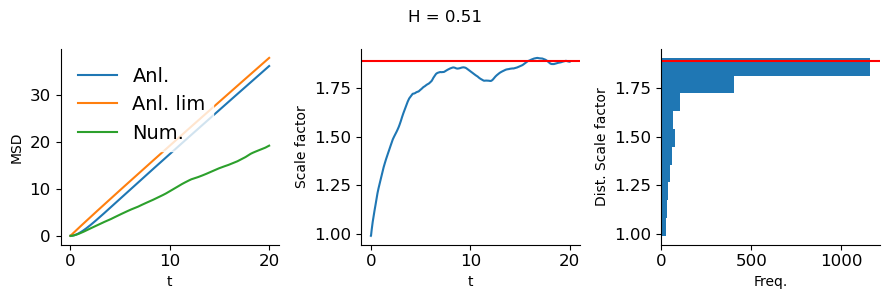

In [6]:
df = pd.DataFrame()
df = pd.concat([df,plot_msd(0.51, T=20)])

100%|██████████| 1000/1000 [08:41<00:00,  1.92it/s]


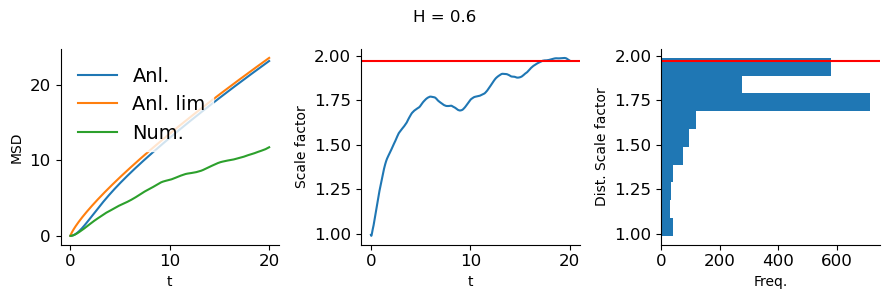

In [7]:
df = pd.concat([df,plot_msd(0.6, T=20)])

100%|██████████| 1000/1000 [08:44<00:00,  1.91it/s]


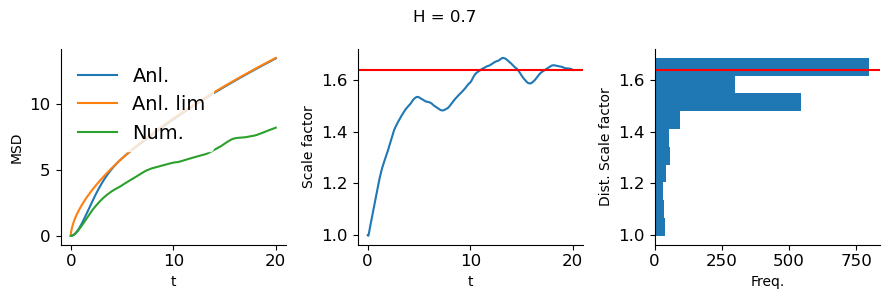

In [8]:
df = pd.concat([df,plot_msd(0.7, T=20)])

100%|██████████| 1000/1000 [08:36<00:00,  1.94it/s]


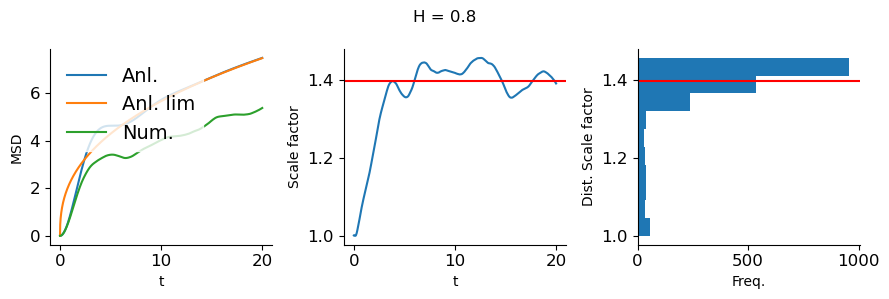

In [9]:
df = pd.concat([df,plot_msd(0.8, T=20)])

100%|██████████| 1000/1000 [08:32<00:00,  1.95it/s]


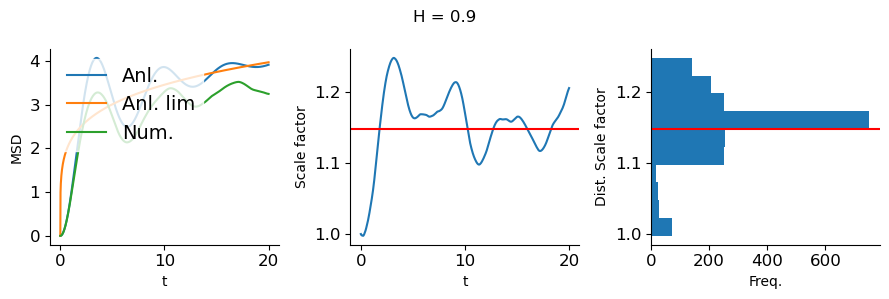

In [10]:
df = pd.concat([df,plot_msd(0.9, T=20)])

100%|██████████| 1000/1000 [26:25<00:00,  1.59s/it]


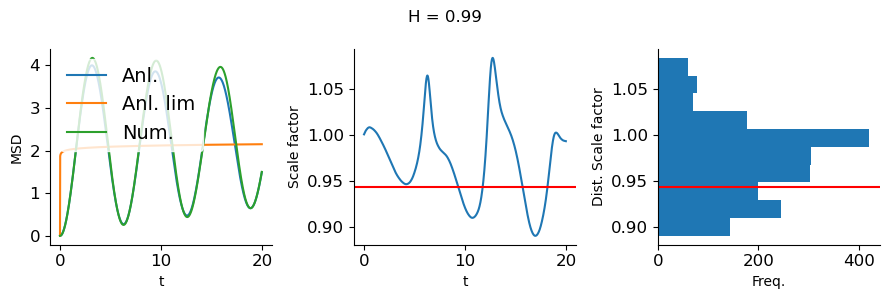

In [12]:
df = pd.concat([df,plot_msd(0.99, T=20)])

In [13]:
df.reset_index(drop = True, inplace = True)
df

,H,scale
0,0.51,1.887169
1,0.60,1.972816
2,0.70,1.639290
3,0.80,1.397708
4,0.90,1.148367
5,0.99,0.943963
